<a href="https://colab.research.google.com/github/hr7657316/computervision/blob/main/Computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

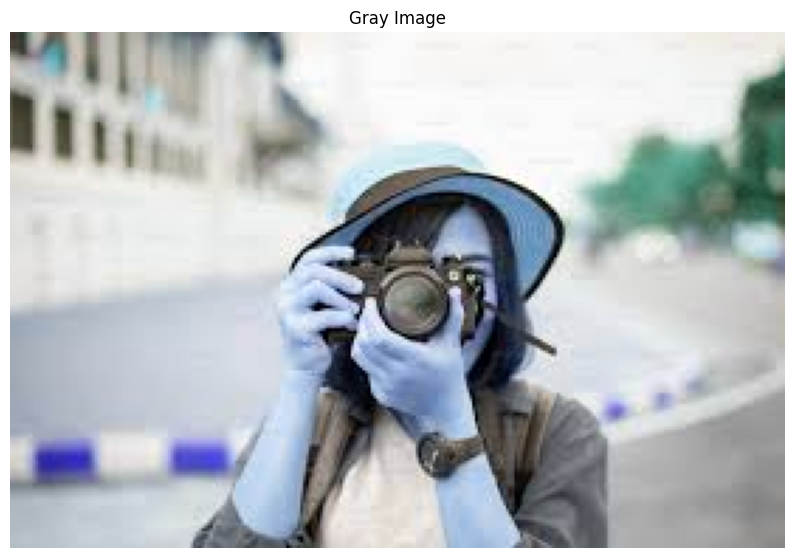

In [ ]:
import cv2
image = cv2.imread("/content/sample_data/images.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)
#from google.colab.patches import cv2_imshow
#cv2_imshow(gray_image)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()



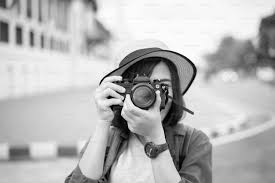

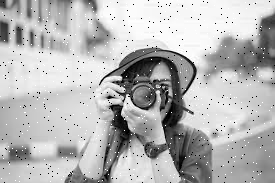

In [ ]:
import random
import cv2
from google.colab.patches import cv2_imshow

def add_noise(img):
    row, col = img.shape
    number_of_pixels = random.randint(1, 50000)

    # Adding white noise (255)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    # Adding black noise (0)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 0

    return img

# Load and process the image
img = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)  # Show original image

img_noise = add_noise(img.copy())  # Ensure original image is not modified
cv2_imshow(img_noise)  # Show noisy image


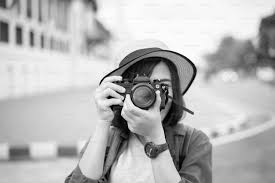

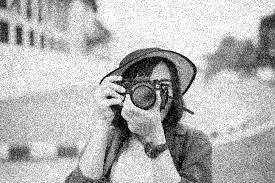

In [ ]:
import cv2
import numpy as np
image = cv2.imread('/content/sample_data/images.jpeg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noise=np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
cv2_imshow(noise)

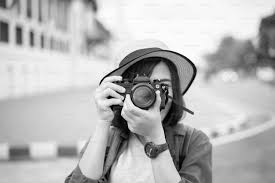

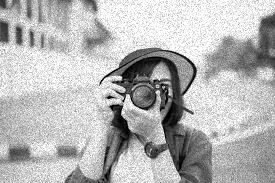

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image in grayscale
image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

# Function to generate speckle noise
def generate_speckle_noise(image_shape, mean=0, variance=0.01):
    noise = np.random.normal(mean, np.sqrt(variance), image_shape)
    speckle_noise = noise * np.ones(image_shape)  # Multiplying by ones doesn't change noise, can be removed
    return speckle_noise

# Generate speckle noise
speckle_noise = generate_speckle_noise(image.shape, mean=0, variance=0.01)

# Add noise to the image
noisy_image = image + speckle_noise * image  # Speckle noise is multiplicative
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Display noisy image
cv2_imshow(noisy_image)
cv2.imwrite('/content/sample_data/noicy.jpeg', noisy_image)


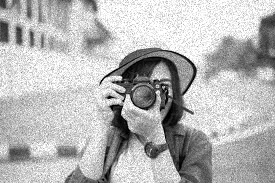

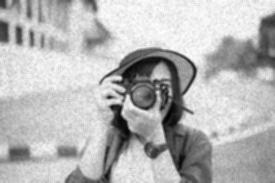

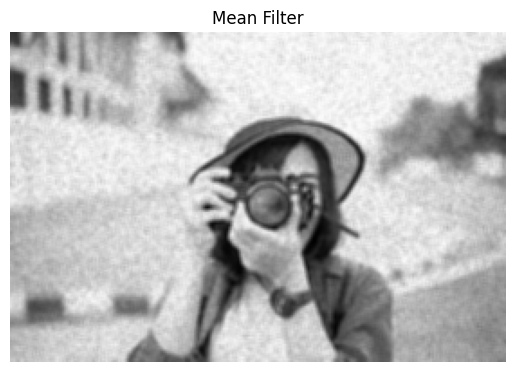

In [ ]:
#mean filtering

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/noicy.jpeg', cv2.IMREAD_GRAYSCALE)
mean_filter = cv2.blur(image, (3,3))
cv2_imshow(image)
cv2_imshow(mean_filter)
import matplotlib.pyplot as plt
plt.imshow(mean_filter, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')
plt.show()


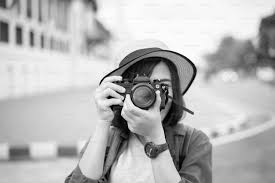

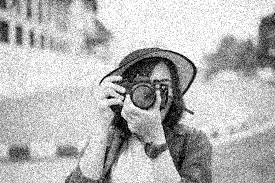

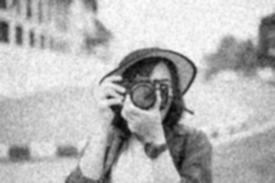

In [ ]:
#Gausina filtering

# The formula for a Gaussian kernel used in Gaussian filtering (smoothing) is given by:
# G(x, y) 1 /2πσ^2 e^(x^2+y^2)/2σ2)
# where:
# G(x, y) is the Gaussian function.
# o is the standard deviation, which controls the spread of the Gaussian.
# x and y are the pixel coordinates relative to the kernel center.
# e is Euler's number (~2.718).
# 2πσ2 is a normalization factor ensuring the kernel sums to 1.
# This kernel is convolved with an image to apply Gaussian blurring, effectively reducing noise and smoothing details.

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
mean=0.5
std_dev=25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noise=np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
gaussian_filter = cv2.GaussianBlur(noise, (5,5), 0)
cv2_imshow(image)
cv2_imshow(noise)
cv2_imshow(gaussian_filter)



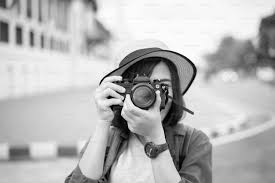

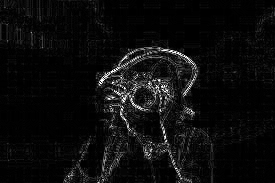

In [ ]:
# Laplacial filter

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)
laplacian_filter = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filter = cv2.convertScaleAbs(laplacian_filter)
cv2_imshow(image)
cv2_imshow(laplacian_filter)

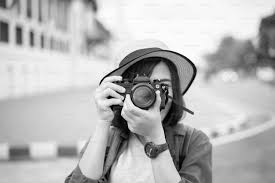

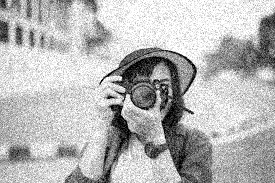

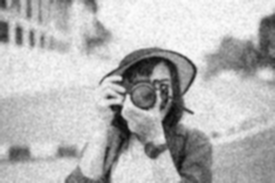

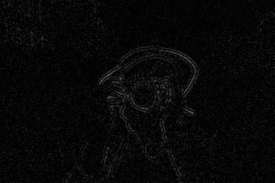

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image in grayscale
image = cv2.imread('/content/sample_data/images.jpeg', cv2.IMREAD_GRAYSCALE)

# Generate Gaussian noise
mean = 0.5
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)

# Add noise and clip values
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

# Apply Gaussian filtering
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Laplacian filter
laplacian_filtered = cv2.Laplacian(gaussian_filtered, cv2.CV_64F)
laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)

# Display images
cv2_imshow(image)                 # Original Image
cv2_imshow(noisy_image)           # Noisy Image
cv2_imshow(gaussian_filtered)     # After Gaussian Filtering
cv2_imshow(laplacian_filtered)    # After Laplacian Filtering


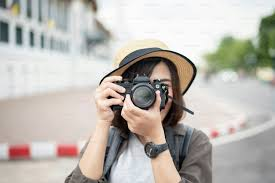

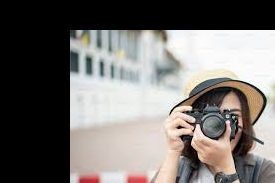

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


tx = 70
ty = 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
cv2_imshow(image)
cv2_imshow(image_translation)

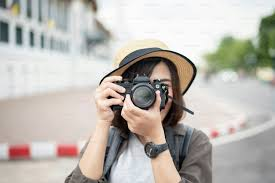

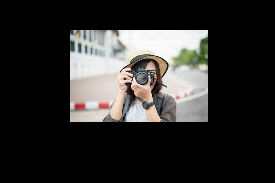

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


tx = 70
ty = 30
translation_matrix = np.float32([[0.5, 0, tx], [0, 0.5, ty]])
image_translation = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
cv2_imshow(image)
cv2_imshow(image_translation)

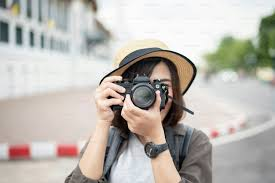

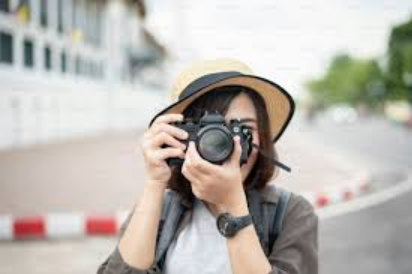

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')


sx,sy = 1.5,1.5
scaled_image = cv2.resize(image,None,fx = sx,fy = sy,interpolation=cv2.INTER_LINEAR)
cv2_imshow(image)
cv2_imshow(scaled_image )


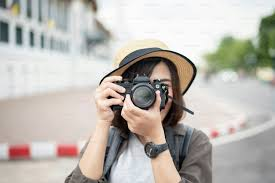

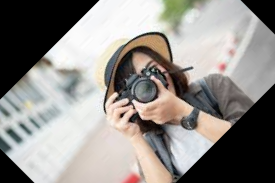

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/sample_data/images.jpeg')
center = (image.shape[1]//2,image.shape[0]//2)
angle = 45
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center,angle,scale)
rotated_image = cv2.warpAffine(image,rotation_matrix,(image.shape[1],image.shape[0]))
cv2_imshow(image)
cv2_imshow(rotated_image)

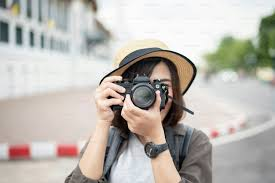

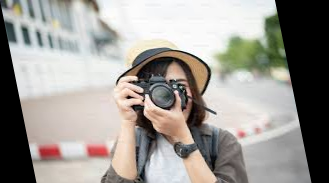

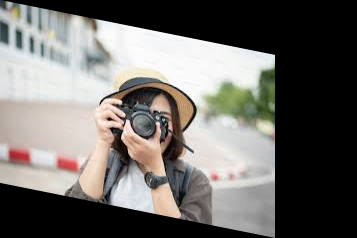

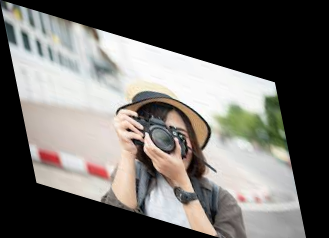

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


image = cv2.imread('/content/sample_data/images.jpeg')
rows,cols = image.shape[:2]
shx = 0.3
shy = 0.2

# Define shear_matrix_x and shear_matrix_y (same as before)
shear_matrix_x = np.float32([[1,shy,0],[0,1,0]])
shear_matrix_y = np.float32([[1,0,0],[shy,1,0]])

# Define shear_matrix_z for combined shear
shear_matrix_z = np.float32([[1, shy, 0], [shx, 1, 0]])  # Define shear_matrix_z

# Perform the warpAffine operations
sheared_image_x = cv2.warpAffine(image,shear_matrix_x,(int(cols+shx*rows),rows))
sheared_image_y = cv2.warpAffine(image,shear_matrix_y,(int(cols+shx*cols),int(rows+shy*cols)))
sheared_image_z = cv2.warpAffine(image, shear_matrix_z, (int(cols + shx * rows), int(rows + shy * cols)))

# Display the images
cv2_imshow(image)
cv2_imshow(sheared_image_x)
cv2_imshow(sheared_image_y)
cv2_imshow(sheared_image_z)

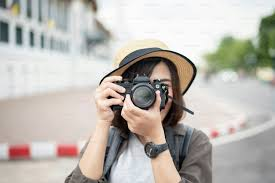

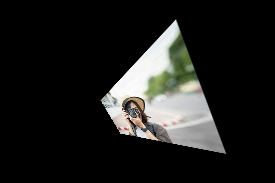

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/sample_data/images.jpeg')
height,width = image.shape[:2]
original_points = np.float32([
    [0,0],
    [width-1,0],
    [0,height-1],
    [width-1,height-1]
])
skewed_points = np.float32([
    [100,100],
    [width-100,20],
    [120,height-50],
    [width-50,height-30]
])
transformation_matrix = cv2.getPerspectiveTransform(original_points,skewed_points)
skewed_image = cv2.warpPerspective(image,transformation_matrix,(width,height))
cv2_imshow(image)
cv2_imshow(skewed_image)





In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the images
image1 = cv2.imread('/content/sample_data/images.jpeg')
image2 = cv2.imread('/content/sample_data/download.jpeg')

# Check if images were loaded successfully
if image1 is None or image2 is None:
    print("Error: Could not load one or both images.")
else:
    # Create an image list
    images = [image1, image2]

    # Create a stitcher object
    stitcher = cv2.Stitcher_create()

    # Attempt to stitch the images
    status, stitched_image = stitcher.stitch(images)

    # Check the stitching status
    if status == cv2.Stitcher_OK:
        # Display the stitched image
        cv2_imshow(stitched_image)
        print("Images stitched successfully!")
    else:
        # Print an error message based on the status code
        error_messages = {
            cv2.Stitcher_ERR_NEED_MORE_IMGS: "Need more images for stitching.",
            cv2.Stitcher_ERR_HOMOGRAPHY_EST_FAIL: "Homography estimation failed.",
            cv2.Stitcher_ERR_CAMERA_PARAMS_ADJUST_FAIL: "Camera parameters adjustment failed."
        }
        error_message = error_messages.get(status, "Unknown stitching error.")
        print(f"Error: Image stitching failed ({error_message})")

Error: Image stitching failed (Need more images for stitching.)


In [ ]:
import numpy as np
import cv2
p1 = np.array([[100,200],[120,220],[130,250],[150,270],[170,290],[200,310],[220,350],[250,400]],dtype = np.float32)
p2 = np.array([[[105,210],[125,230],[140,260],[160,280],[185,300],[215,330],[240,370],[270,420]]],dtype = np.float32)

F,mask = cv2.findFundamentalMat(p1,p2,cv2.FM_8POINT)
import numpy as np
import cv2
p1 = np.array([[100,200],[120,220],[130,250],[150,270],[170,290],[200,310],[220,350],[250,400]],dtype = np.float32)
p2 = np.array([[[105,210],[125,230],[140,260],[160,280],[185,300],[215,330],[240,370],[270,420]]],dtype = np.float32)

F,mask = cv2.findFundamentalMat(p1,p2,cv2.FM_8POINT)
if F is not None:
  print("Fundamental Matrix:",F)
else:
  print("Fundamental Matrix not found")








Fundamental Matrix: [[ 5.58521987e-05  5.67852848e-06 -1.12894079e-02]
 [-6.82948523e-05  2.91295431e-05  1.88002661e-03]
 [ 1.15107646e-02 -8.89336744e-03  1.00000000e+00]]


In [ ]:
import numpy as np
import cv2
p1=np.array([[1000,0,320,0],[0,1000,240,0],[0,0,1,0]],dtype=np.float32)
p2=np.array([[1000,0,320,-100],[0,1000,240,0],[0,0,1,0]],dtype=np.float32) # Fixed: p2 was previously assigned to p1
x1=np.array([150,200],dtype=np.float32)  # Removed the homogeneous coordinate (1)
x2=np.array([160,210],dtype=np.float32)  # Removed the homogeneous coordinate (1)
triangulated=cv2.triangulatePoints(p1,p2,x1,x2)
x=triangulated[:3]/triangulated[3]
print("Triangulated point:",x.flatten())

Triangulated point: [ 1.682844   0.3463606 -9.89578  ]


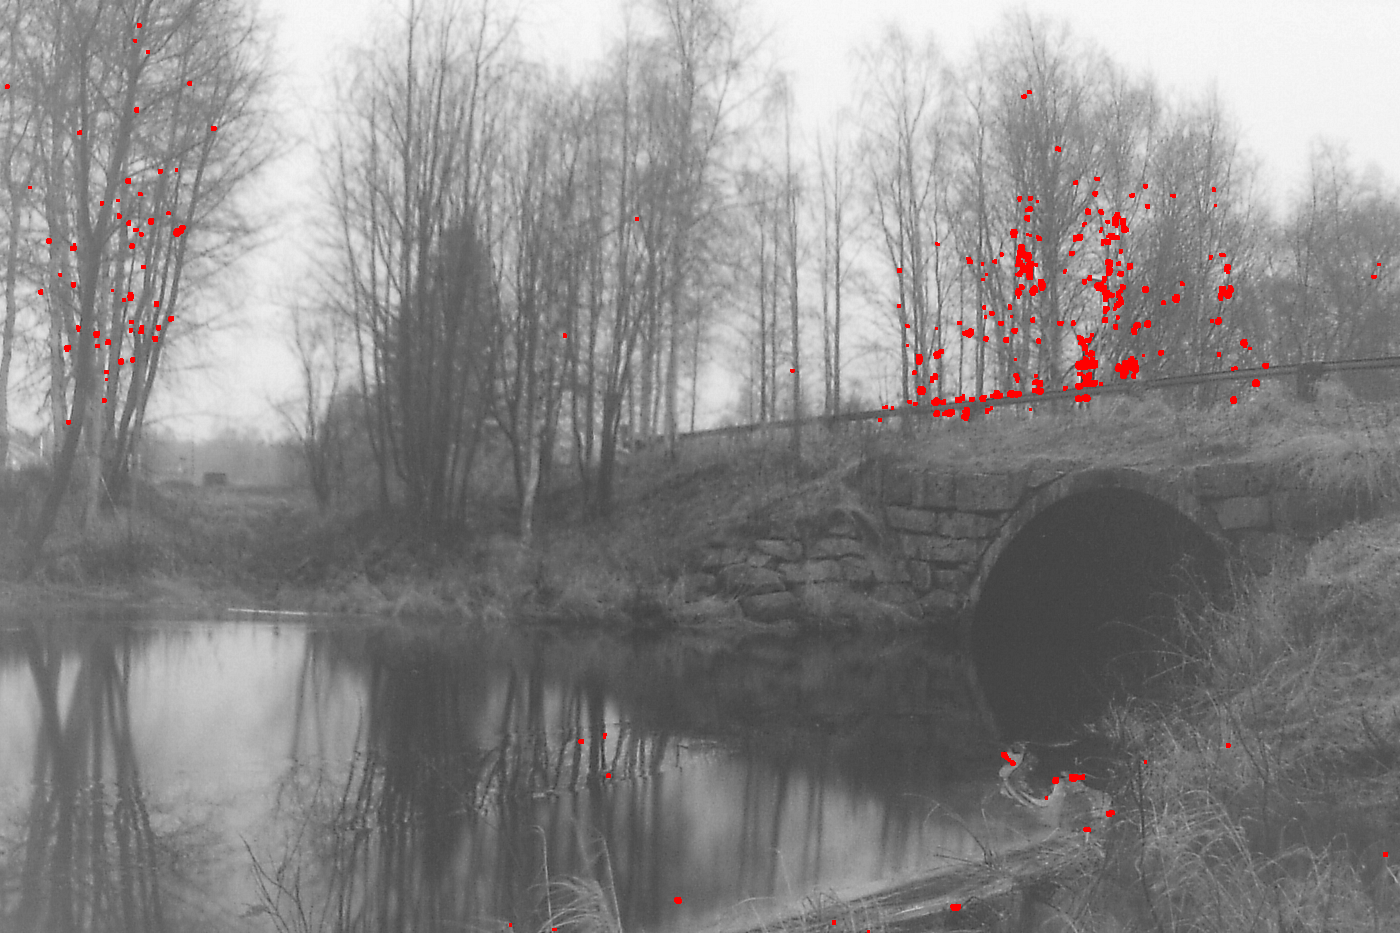

In [4]:
import cv2
import numpy as np # Import the numpy library
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/sample_data/low.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray_image) # Now 'np' is defined and can be used
block_size = 5
aperture_size = 3
k = 0.06
harris = cv2.cornerHarris(gray, block_size, aperture_size, k)
harris = cv2.dilate(harris, None)
thresold = 0.05 * harris.max()
image[harris > thresold] = [0, 0, 255]
cv2_imshow(image)

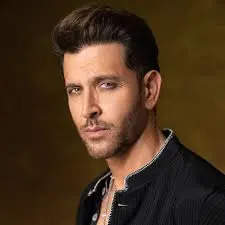

Number of keypoints: (< cv2.KeyPoint 0x7dc3c1730f00>, < cv2.KeyPoint 0x7dc3c1733c00>, < cv2.KeyPoint 0x7dc3c1730060>, < cv2.KeyPoint 0x7dc3c1730a20>, < cv2.KeyPoint 0x7dc3c1731110>, < cv2.KeyPoint 0x7dc3c1731380>, < cv2.KeyPoint 0x7dc3c1731140>, < cv2.KeyPoint 0x7dc3c1730c60>, < cv2.KeyPoint 0x7dc3c1733150>, < cv2.KeyPoint 0x7dc3c1731710>, < cv2.KeyPoint 0x7dc3c1733d80>, < cv2.KeyPoint 0x7dc3c1730510>, < cv2.KeyPoint 0x7dc3c1733e10>, < cv2.KeyPoint 0x7dc3c17313e0>, < cv2.KeyPoint 0x7dc3c1731500>, < cv2.KeyPoint 0x7dc3c1733f60>, < cv2.KeyPoint 0x7dc3c1730270>, < cv2.KeyPoint 0x7dc3c17304b0>, < cv2.KeyPoint 0x7dc3c17305d0>, < cv2.KeyPoint 0x7dc3c17306c0>, < cv2.KeyPoint 0x7dc3c1731cb0>, < cv2.KeyPoint 0x7dc3c17322b0>, < cv2.KeyPoint 0x7dc3c17310e0>, < cv2.KeyPoint 0x7dc3c1730f30>, < cv2.KeyPoint 0x7dc3c1730db0>, < cv2.KeyPoint 0x7dc3c1731860>, < cv2.KeyPoint 0x7dc3c1730cc0>, < cv2.KeyPoint 0x7dc3c1731bc0>, < cv2.KeyPoint 0x7dc3c1733c90>, < cv2.KeyPoint 0x7dc3c17313b0>, < cv2.KeyPoint 0x7

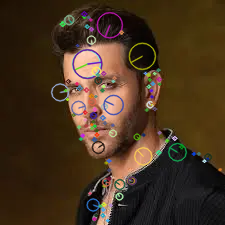

In [7]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/sample_data/images2.webp")
cv2_imshow(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
print("Number of keypoints:", keypoints)
print("Descriptor shape:", descriptors)
sift_image = cv2.drawKeypoints(image, keypoints, None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(sift_image)



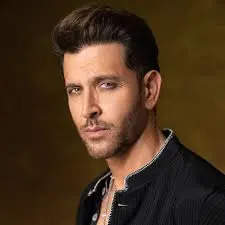

AttributeError: module 'cv2.xfeatures2d' has no attribute 'SURF_create'

In [12]:
import cv2
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("/content/sample_data/images2.webp")
cv2_imshow(image)  # Display original image

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create SURF object
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Print information about keypoints and descriptors
print("Number of keypoints:", len(keypoints))
print("Descriptor shape:", descriptors.shape)

# Draw keypoints on the image
surf_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with keypoints
cv2_imshow(surf_image)

In [9]:
!pip install opencv-contrib-python